In [1]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize
import seaborn as sns
sns.set(font_scale = 2)

In [2]:
data = pd.read_csv('AutomobileDataSet.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [18]:
for col in ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [5]:
numeric_subset = data.select_dtypes('number')
numeric_subset.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
missing_values_table(data)

Your selected dataframe has 26 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
normalized-losses,41,20.0
bore,4,2.0
stroke,4,2.0
price,4,2.0
horsepower,2,1.0
peak-rpm,2,1.0


Знаходимо коефіцієнти кореляції для числових атрибутів.

In [9]:
numeric_subset.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.531954,-0.074362,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.490378,0.161477,0.249786,0.352297,-0.361052,-0.470414,-0.544082,0.584642
length,-0.357612,0.023220,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.105073,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,-0.432335,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.119893,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.167365,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,-0.036167,0.490378,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.065627,0.161477,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310


Візуалізуємо за допомогою heatmap.

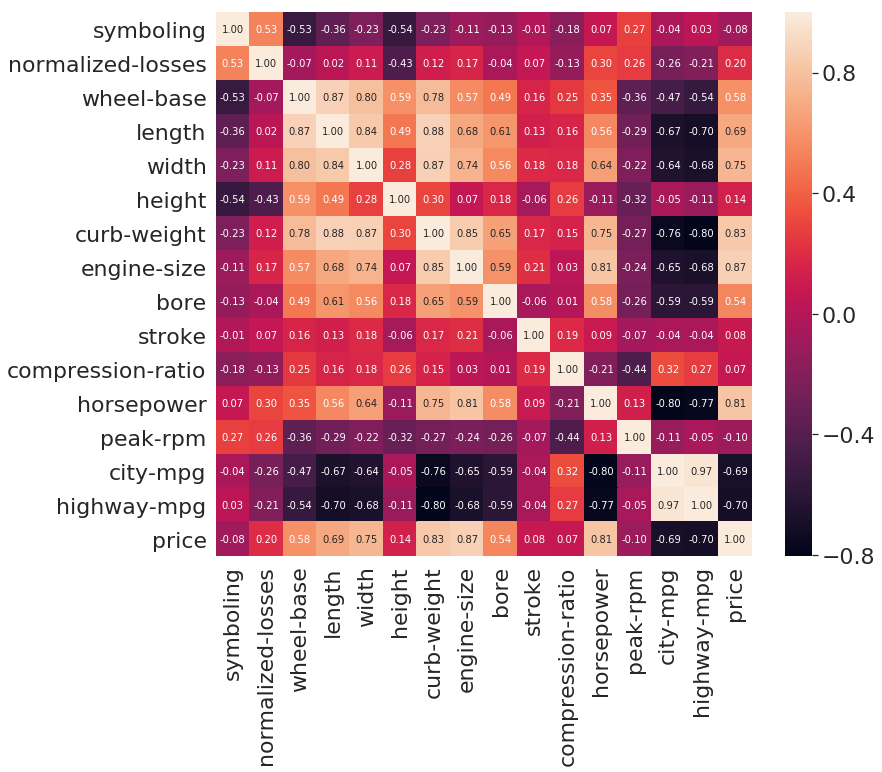

In [10]:
corr = numeric_subset.corr()
plt.figure(figsize=(12,10))
a = sns.heatmap(corr, annot=True, fmt='.2f')

Позитивна кореляція:
- city-mpg з highway-mpg (0.97);
- price з engine-size(0.84), width(0.84) і curb-weight (0.89);
- curb-weight корелюється з engine-size(0.89), length(0.87), width(0.87) і wheel-base(0.81);
- wheel-base з length(0.87) і width(0.82).

Негативна кореляція:
- horsepower з city-mpg (-0.84);
- horsepower з highway-mpg (-0.83).

Можна знехтувати:
    - city-mpg.
    